In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime


2023-11-01 16:31:27.807037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading Data and Checking for Missing Data

In [2]:

# Read data
df = pd.read_csv('data_input_test.csv', delimiter=";") 
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54620 entries, 0 to 54619
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Timestamp   54620 non-null  object
 1   energy_use  54063 non-null  object
dtypes: object(2)
memory usage: 853.6+ KB


(                   Timestamp energy_use
 0  2022-01-01T00:00:00+01:00          0
 1  2022-01-01T00:15:00+01:00          0
 2  2022-01-01T00:30:00+01:00          0
 3  2022-01-01T00:45:00+01:00          0
 4  2022-01-01T01:00:00+01:00          0,
 None)

In [3]:
df.isnull().to_numpy().nonzero(), df.isnull().sum(), df.isna().sum()

((array([ 1172,  9573,  9574,  9575,  9576,  9577,  9578,  9579,  9580,
          9581,  9582,  9583,  9584,  9585,  9586,  9587,  9588,  9589,
          9590,  9591,  9592,  9593,  9594,  9595,  9596,  9597,  9598,
          9599,  9600,  9601,  9602,  9603,  9604,  9605,  9606,  9607,
          9608,  9609,  9610,  9611,  9612,  9613,  9614,  9615,  9616,
          9617,  9618,  9619,  9620,  9621,  9622,  9623,  9624,  9625,
          9626,  9627,  9628,  9629,  9630,  9631,  9632,  9633,  9634,
          9635,  9636,  9637,  9638,  9639,  9640,  9641,  9642,  9643,
          9644,  9645,  9646,  9647,  9648,  9649,  9650,  9651,  9652,
          9653,  9654,  9655,  9656,  9657,  9658,  9659,  9660,  9661,
          9662,  9663,  9664,  9665,  9666,  9667,  9668,  9669,  9670,
          9671,  9672,  9673,  9674,  9675,  9676,  9677,  9678,  9679,
          9680,  9681,  9682,  9683,  9684,  9685,  9686,  9687,  9688,
          9689,  9690,  9691,  9692,  9693,  9694,  9695,  9696,

## Handling Missing Data and Converting to Appropriate Data Type

In [4]:
 # Convert to numeric and interpolate missing values
df['energy_use'] = pd.to_numeric(df['energy_use'],errors='coerce').interpolate(axis=0)

# convert to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])#.dt.strftime('%Y-%m-%d %H:%M:%S')

/tmp/ipykernel_61514/3370626775.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])#.dt.strftime('%Y-%m-%d %H:%M:%S')


In [5]:
# Check for time interval, 15 minutes
df['Timestamp'].diff().mean() 

Timedelta('0 days 00:15:00')

In [6]:
print(60*24//15)# * (df['Timestamp'].max() - df['Timestamp'].min()).days) # Check for missing values
print(df['Timestamp'].max(), df['Timestamp'].min()) # Check for missing values

96
2023-07-23 23:45:00+02:00 2022-01-01 00:00:00+01:00


In [7]:
print(df.isnull().sum(), '\n', df.isna().sum()) # Check for null values
print(df.info(), df.head()) # Check data types

Timestamp     0
energy_use    0
dtype: int64 
 Timestamp     0
energy_use    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54620 entries, 0 to 54619
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   54620 non-null  object 
 1   energy_use  54620 non-null  float64
dtypes: float64(1), object(1)
memory usage: 853.6+ KB
None                    Timestamp  energy_use
0  2022-01-01 00:00:00+01:00         0.0
1  2022-01-01 00:15:00+01:00         0.0
2  2022-01-01 00:30:00+01:00         0.0
3  2022-01-01 00:45:00+01:00         0.0
4  2022-01-01 01:00:00+01:00         0.0


## Visualising Data

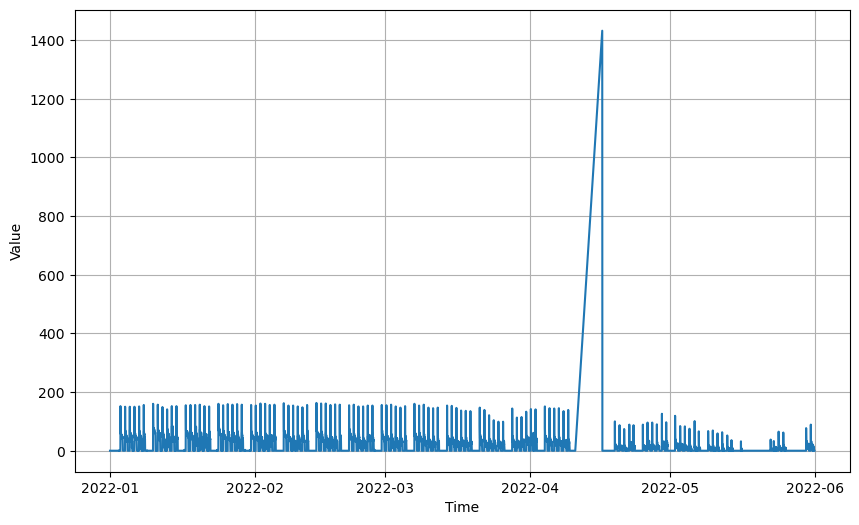

In [8]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

series = df['energy_use'].to_numpy()[: 96*151]
time = df['Timestamp'].to_numpy()[: 96*151]
plot_series(time, series)

## Splitting Data into Train and Validation Sets

In [9]:
# Define the split time
split_time = 120*96

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

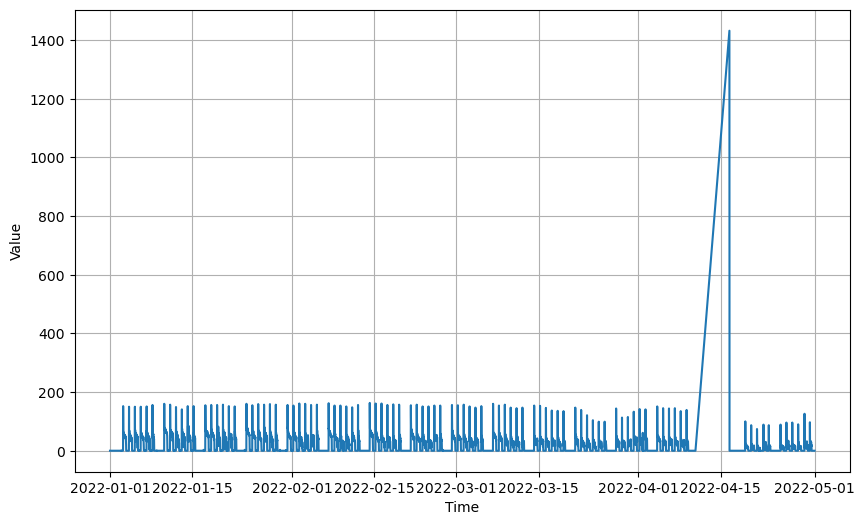

In [10]:
# Plot the train set
plot_series(time_train, x_train)

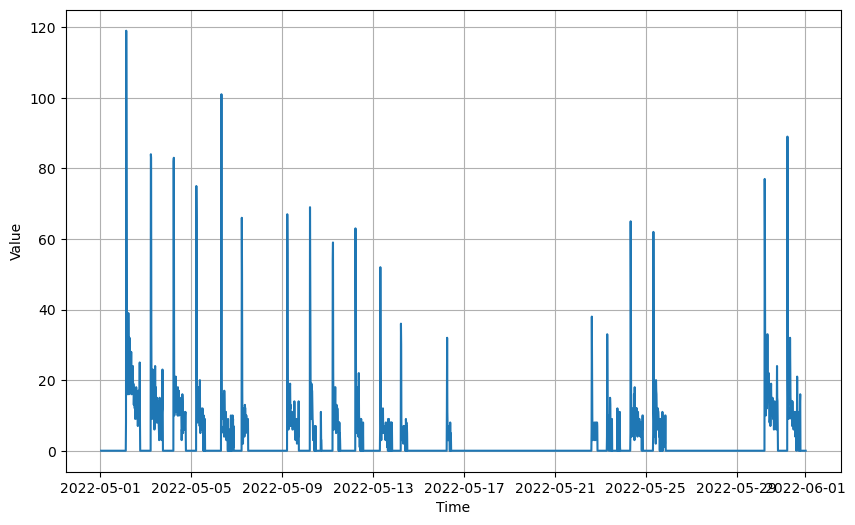

In [11]:
# Plot the validation set
plot_series(time_valid, x_valid)

## Naive Forecast
As a baseline - that we can try to beat with ML- one can do a naive forecast where you assume that the next value will be the same as the previous time step. 

** It is identical to the validation set but delayed one time step **


In [95]:
# Generate the naive forecast
naive_forecast = series[split_time - 1:-1]

# Define time step
time_step = 100

# Print values
print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step + 1]}')


ground truth at time step 100: 0.0
prediction at time step 101: 0.0


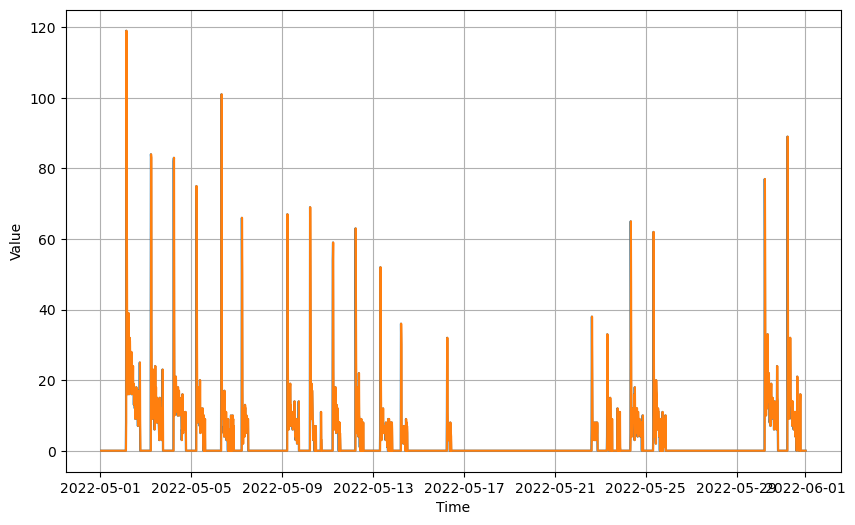

In [96]:
# Plot the results
plot_series(time_valid, (x_valid, naive_forecast))

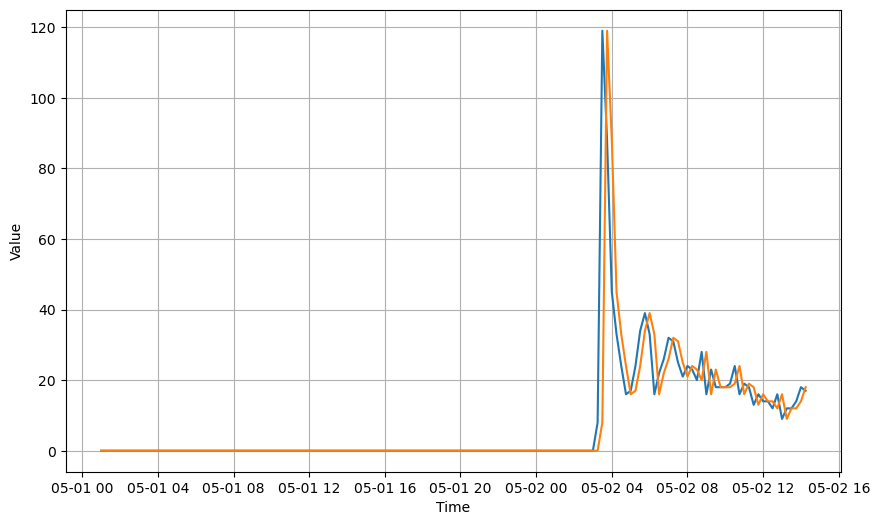

In [97]:
# Zooming in to see the first 150 time steps
plot_series(time_valid, (x_valid, naive_forecast), start=0, end=150)

## Evaluating Naive Model

In [98]:
# The values below will be your baseline and you will see if you can use other techniques to improve this value.

print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

45.86290322580645
1.709005376344086


## Statistical Techniques to Improve Predictions

## Moving Average Forecast

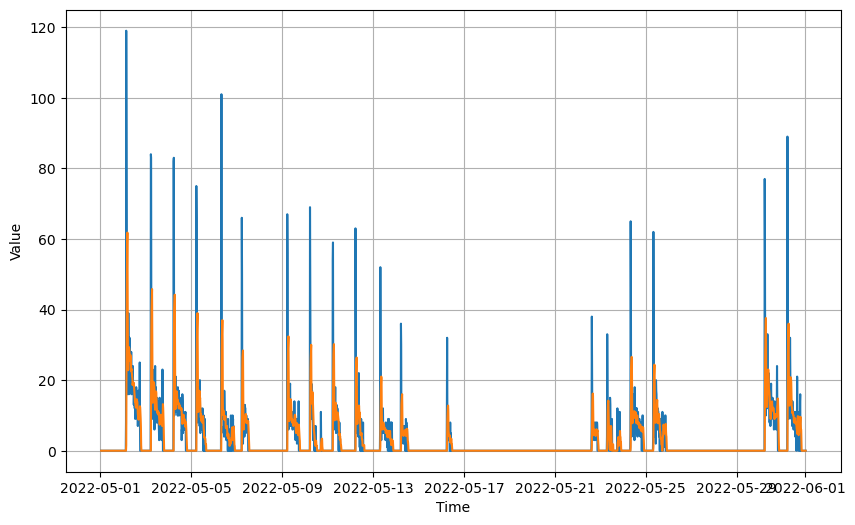

In [99]:
def moving_average_forecast(series, window_size):
    """Generates a moving average forecast

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to compute the average for

    Returns:
      forecast (array of float) - the moving average forecast
    """

    # Initialize a list
    forecast = []
    
    # Compute the moving average based on the window size
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())
    
    # Convert to a numpy array
    forecast = np.array(forecast)

    return forecast


# Generate the moving average forecast
moving_avg = moving_average_forecast(series, 5)[split_time - 5:]

# Plot the results
plot_series(time_valid, (x_valid, moving_avg))

## Evaluating Metric For Moving Average

In [100]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

56.50043010752688
2.0577956989247315


### Differencing and Moving Average Forecast

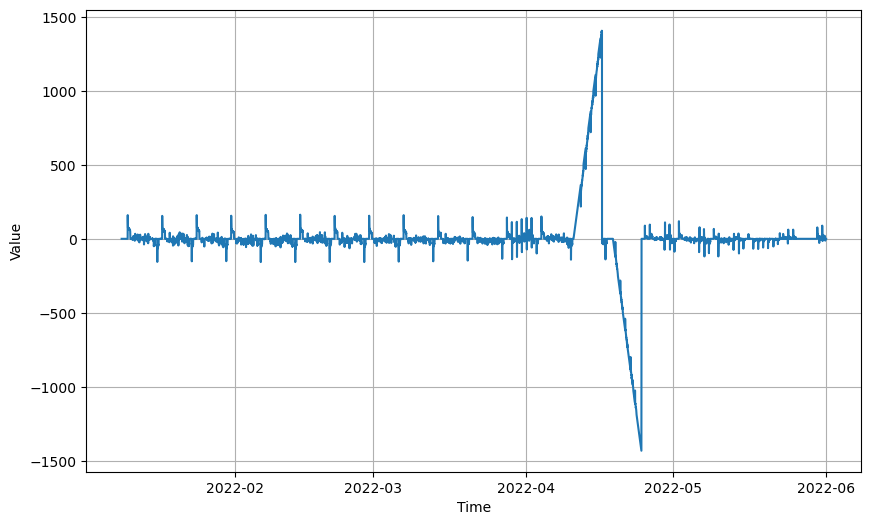

In [101]:
# The trend and seasonality seem to be gone so now you can retry using the moving average.
n = 96*8 # patters repeats every 96*8 time steps or 8 days

# Subtract the values at t-96*8 from original series
diff_series = (series[n:] - series[:-n])

# Truncate the first n time steps
diff_time = time[n:]

# Plot the results
plot_series(diff_time, diff_series)

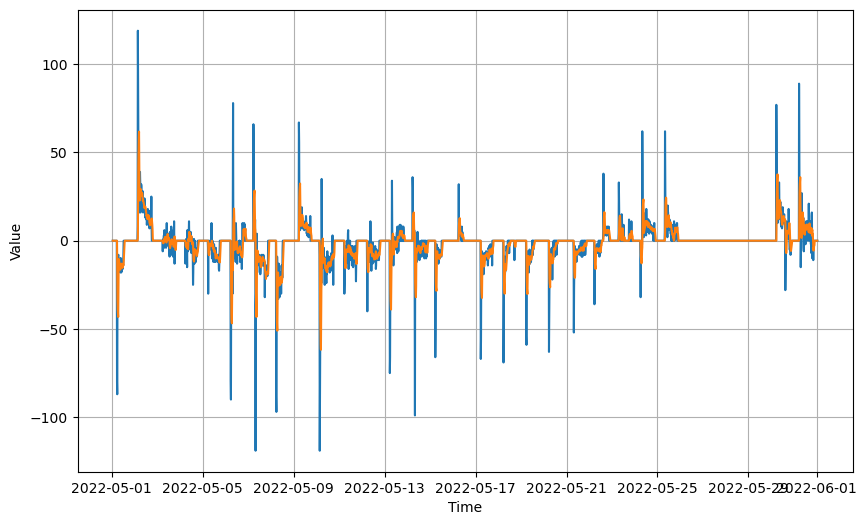

In [102]:
# Generate moving average from the time differenced dataset
window_size = 5

diff_moving_avg = moving_average_forecast(diff_series, window_size)

# Slice the prediction points that corresponds to the validation set time steps
diff_moving_avg = diff_moving_avg[split_time - n - window_size:]

# Slice the ground truth points that corresponds to the validation set time steps
diff_series = diff_series[split_time - n:]

# Plot the results
plot_series(time_valid, (diff_series, diff_moving_avg))

## Add Trend and Seasonality to Difference Moving Average by adding the past values

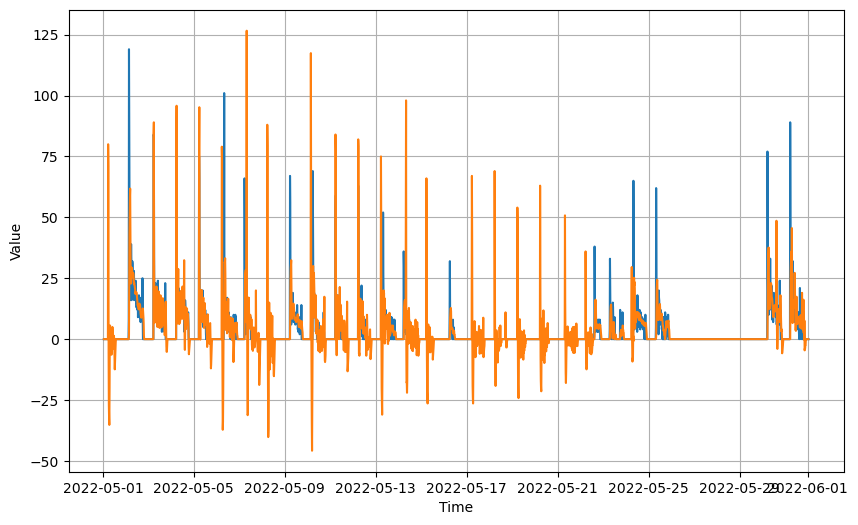

In [105]:
# Add the trend and seasonality from the original series, bring back the trend and seasonality by adding the past values from t-96*8
diff_moving_avg_plus_past = series[split_time - n:-n] + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))

In [106]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

98.22360215053763
3.5249999999999995


## Add Trend and Seasonality to Difference Moving Average by Smoothed adding the past values

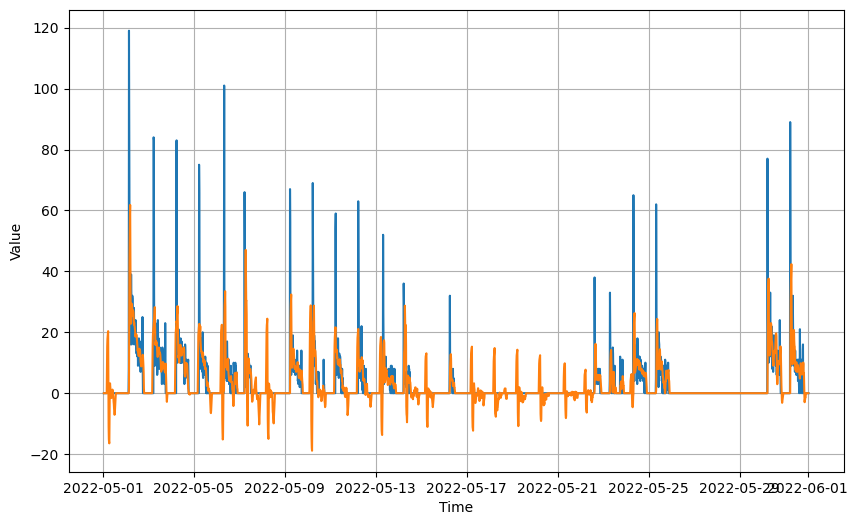

In [107]:
# Smooth the original series before adding the time differenced moving average
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 773:-762], 11) + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_smooth_past))

In [108]:
 # Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

61.60335421665334
2.9775659824046916


## Deep Neural Network

In [15]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [16]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows for training

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels. The last value is the label and the rest are the features 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows. reduce sequence bias while training your model. 
    # This refers to the neural network overfitting to the order of inputs and consequently, 
    # it will not perform well when it does not see that particular order when testing.
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

# Generate the dataset windows from the training dataset
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-11-01 16:34:00.357738: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 16:34:00.358399: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
# Print properties of a single batch
for windows in dataset.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')
  print(f'shape of first element: {windows[0].shape}')
  print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 20)
shape of second element: (32,)


## Creating and Training the first DNN 

In [53]:
# Build the model
model_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Set the training parameters
model_baseline.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

# Train the model
model_baseline.fit(dataset,epochs=10)

Epoch 1/10


360/360 [==============================] - 6s 16ms/step - loss: 33506.5586
Epoch 2/10
360/360 [==============================] - 7s 19ms/step - loss: 33475.9805
Epoch 3/10
360/360 [==============================] - 7s 19ms/step - loss: 33446.0703
Epoch 4/10
360/360 [==============================] - 6s 16ms/step - loss: 33416.7539
Epoch 5/10
360/360 [==============================] - 7s 19ms/step - loss: 33387.6719
Epoch 6/10
360/360 [==============================] - 6s 17ms/step - loss: 33358.9766
Epoch 7/10
360/360 [==============================] - 7s 18ms/step - loss: 33330.6484
Epoch 8/10
360/360 [==============================] - 7s 19ms/step - loss: 33302.7539
Epoch 9/10
360/360 [==============================] - 7s 18ms/step - loss: 33275.3828
Epoch 10/10
360/360 [==============================] - 6s 16ms/step - loss: 33248.3164


1/1 [==============================] - 0s 41ms/step


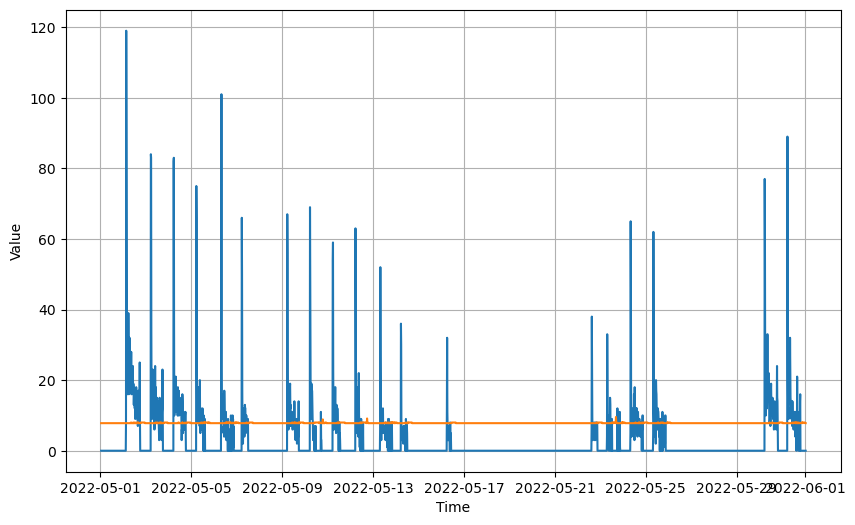

In [57]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_baseline.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

## Performance Measurement for DNN 1

* Performs bad because of the large learning rate and small number of iterations

In [58]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

94.38311
7.552727


## Tunning learning rate

In [66]:
# Build the Model
# Tune the learning rate

model_tune = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

In [67]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100


360/360 [==============================] - 5s 14ms/step - loss: 3426.0173 - lr: 1.0000e-08
Epoch 2/100
360/360 [==============================] - 5s 15ms/step - loss: 1129.9242 - lr: 1.1220e-08
Epoch 3/100
360/360 [==============================] - 5s 13ms/step - loss: 922.0161 - lr: 1.2589e-08
Epoch 4/100
360/360 [==============================] - 6s 15ms/step - loss: 872.2080 - lr: 1.4125e-08
Epoch 5/100
360/360 [==============================] - 6s 16ms/step - loss: 817.9807 - lr: 1.5849e-08
Epoch 6/100
360/360 [==============================] - 7s 19ms/step - loss: 748.7542 - lr: 1.7783e-08
Epoch 7/100
360/360 [==============================] - 7s 19ms/step - loss: 762.2035 - lr: 1.9953e-08
Epoch 8/100
360/360 [==============================] - 6s 17ms/step - loss: 711.7784 - lr: 2.2387e-08
Epoch 9/100
360/360 [==============================] - 6s 17ms/step - loss: 643.5444 - lr: 2.5119e-08
Epoch 10/100
360/360 [==============================] - 7s 20ms/step - loss: 623.9805 - lr: 

(1e-08, 1e-06, 0.0, 5000.0)

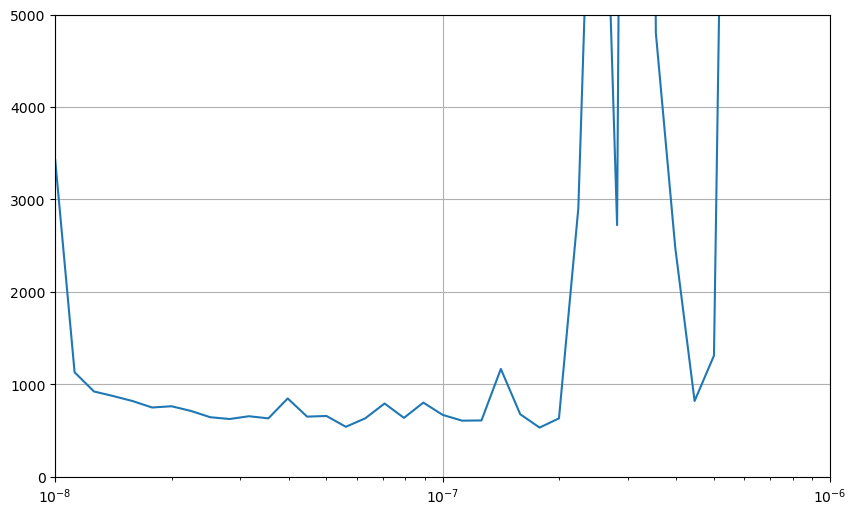

In [70]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
#plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-6, 0, 5000])

## Building a new DNN using the learning rate with the minimum stable loss from figure above

In [71]:
# Build the model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

# Set the optimizer with the tuned learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9)

# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100)

Epoch 1/100
360/360 [==============================] - 7s 18ms/step - loss: 1910.7454
Epoch 2/100
360/360 [==============================] - 5s 14ms/step - loss: 1054.8163
Epoch 3/100
360/360 [==============================] - 5s 14ms/step - loss: 632.1622
Epoch 4/100
360/360 [==============================] - 6s 15ms/step - loss: 612.3870
Epoch 5/100
360/360 [==============================] - 7s 19ms/step - loss: 755.1702
Epoch 6/100
360/360 [==============================] - 6s 16ms/step - loss: 843.3649
Epoch 7/100
360/360 [==============================] - 7s 20ms/step - loss: 501.4248
Epoch 8/100
360/360 [==============================] - 7s 20ms/step - loss: 555.0326
Epoch 9/100
360/360 [==============================] - 6s 16ms/step - loss: 523.4025
Epoch 10/100
360/360 [==============================] - 8s 21ms/step - loss: 505.6177
Epoch 11/100
360/360 [==============================] - 8s 21ms/step - loss: 495.7938
Epoch 12/100
360/360 [==============================] - 7s 20

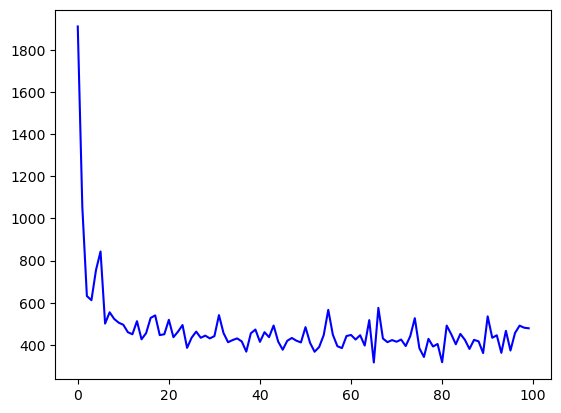

In [72]:
# Plot the loss
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

1/1 [==============================] - 0s 45ms/step


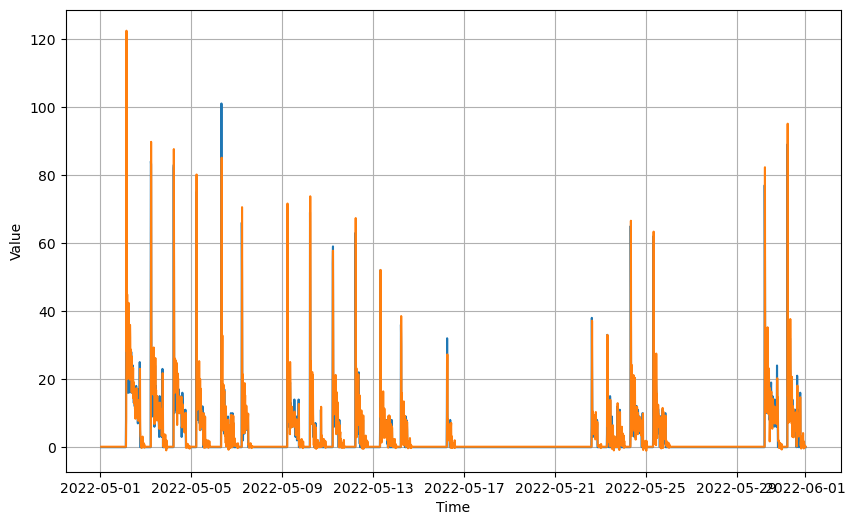

In [73]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_tune.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

## Performance Measurement for DNN 2
Prediction accuracy is close to the benchmark values of the Naive Forecast which has a mean-suare error of $45.86290322580645$ and mean absolute error of $1.709005376344086$



In [74]:
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

41.63296
1.9037145


## Training RNN

In [113]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate
learning_rate = 1e-7

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(dataset,epochs=100)

Epoch 1/100
360/360 [==============================] - 8s 19ms/step - loss: 42.8950 - mae: 43.1510
Epoch 2/100
360/360 [==============================] - 7s 20ms/step - loss: 39.2135 - mae: 39.4687
Epoch 3/100
360/360 [==============================] - 9s 23ms/step - loss: 37.2612 - mae: 37.5125
Epoch 4/100
360/360 [==============================] - 10s 26ms/step - loss: 36.2821 - mae: 36.5311
Epoch 5/100
360/360 [==============================] - 11s 31ms/step - loss: 35.6370 - mae: 35.8858
Epoch 6/100
360/360 [==============================] - 9s 25ms/step - loss: 35.1063 - mae: 35.3553
Epoch 7/100
360/360 [==============================] - 11s 30ms/step - loss: 34.6289 - mae: 34.8787
Epoch 8/100
360/360 [==============================] - 10s 27ms/step - loss: 34.2156 - mae: 34.4645
Epoch 9/100
360/360 [==============================] - 9s 25ms/step - loss: 33.8448 - mae: 34.0937
Epoch 10/100
360/360 [==============================] - 9s 24ms/step - loss: 33.5263 - mae: 33.7758
Epoch

1/1 [==============================] - 0s 86ms/step


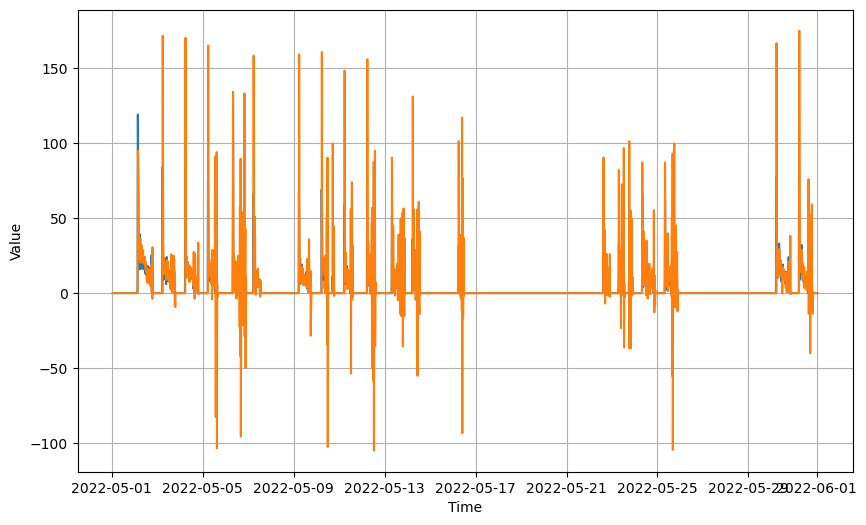

In [114]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [115]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

214.41663
4.5379496


Using DNN, RNN and CNN to build a network

In [18]:
# Build the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

 # Print the model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 64)            256       
                                                                 
 lstm (LSTM)                 (None, 20, 64)            33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 30)                1950      
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
 lambda (Lambda)             (None, 1)                 0

In [19]:
# Get initial weights
init_weights = model.get_weights()

# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
360/360 [==============================] - 99s 224ms/step - loss: 51.4361 - lr: 1.0000e-08
Epoch 2/100
360/360 [==============================] - 96s 264ms/step - loss: 40.3652 - lr: 1.1220e-08
Epoch 3/100
360/360 [==============================] - 105s 292ms/step - loss: 39.0178 - lr: 1.2589e-08
Epoch 4/100
360/360 [==============================] - 102s 281ms/step - loss: 37.0692 - lr: 1.4125e-08
Epoch 5/100
360/360 [==============================] - 78s 214ms/step - loss: 35.7954 - lr: 1.5849e-08
Epoch 6/100
360/360 [==============================] - 66s 182ms/step - loss: 34.8821 - lr: 1.7783e-08
Epoch 7/100
360/360 [==============================] - 57s 156ms/step - loss: 33.0659 - lr: 1.9953e-08
Epoch 8/100
360/360 [==============================] - 73s 199ms/step - loss: 32.6729 - lr: 2.2387e-08
Epoch 9/100
360/360 [==============================] - 90s 247ms/step - loss: 32.1888 - lr: 2.5119e-08
Epoch 10/100
360/360 [==============================] - 77s 212ms/step 

(1e-08, 0.001, 0.0, 100.0)

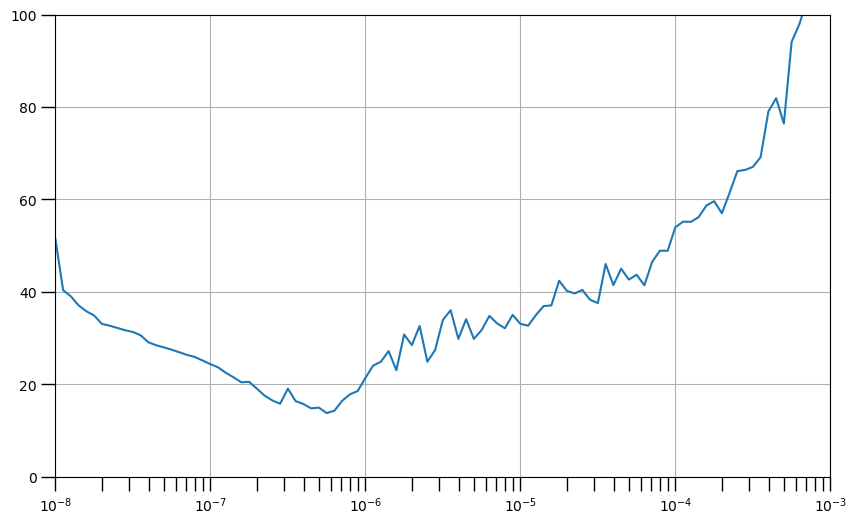

In [20]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 100])

In [21]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

In [22]:
# Set the learning rate
learning_rate = 1e-7

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(dataset,epochs=10)

Epoch 1/10
360/360 [==============================] - 45s 114ms/step - loss: 38.0885 - mae: 38.4722
Epoch 2/10
360/360 [==============================] - 47s 129ms/step - loss: 32.3774 - mae: 32.7210
Epoch 3/10
360/360 [==============================] - 45s 125ms/step - loss: 31.7459 - mae: 32.0988
Epoch 4/10
360/360 [==============================] - 44s 122ms/step - loss: 28.7258 - mae: 29.0721
Epoch 5/10
360/360 [==============================] - 50s 138ms/step - loss: 27.3722 - mae: 27.7150
Epoch 6/10
360/360 [==============================] - 54s 149ms/step - loss: 26.4012 - mae: 26.7301
Epoch 7/10
360/360 [==============================] - 65s 179ms/step - loss: 25.5465 - mae: 25.8778
Epoch 8/10
360/360 [==============================] - 72s 199ms/step - loss: 24.7044 - mae: 25.0358
Epoch 9/10
360/360 [==============================] - 89s 246ms/step - loss: 23.8886 - mae: 24.2161
Epoch 10/10
360/360 [==============================] - 43s 120ms/step - loss: 23.0537 - mae: 23.3851

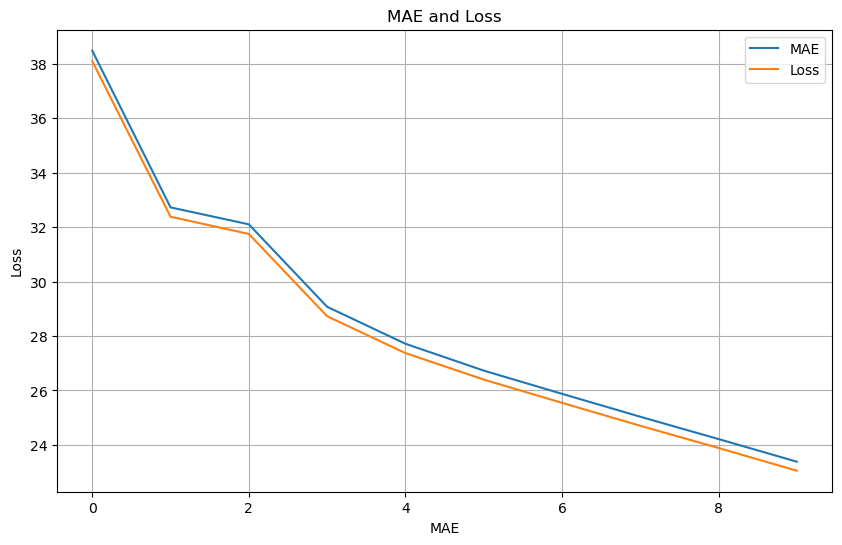

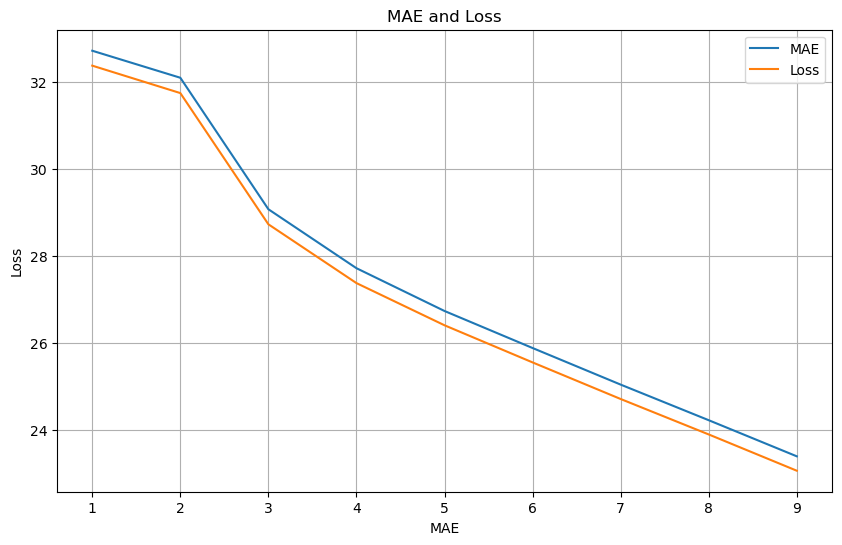

In [24]:
def plot_series(x, y, format="-", start=0, end=None, 
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      label (string) - tag for the line
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()



# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, loss), 
    title='MAE and Loss', 
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom, 
    y=(mae_zoom, loss_zoom), 
    title='MAE and Loss', 
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

93/93 [==============================] - 5s 42ms/step


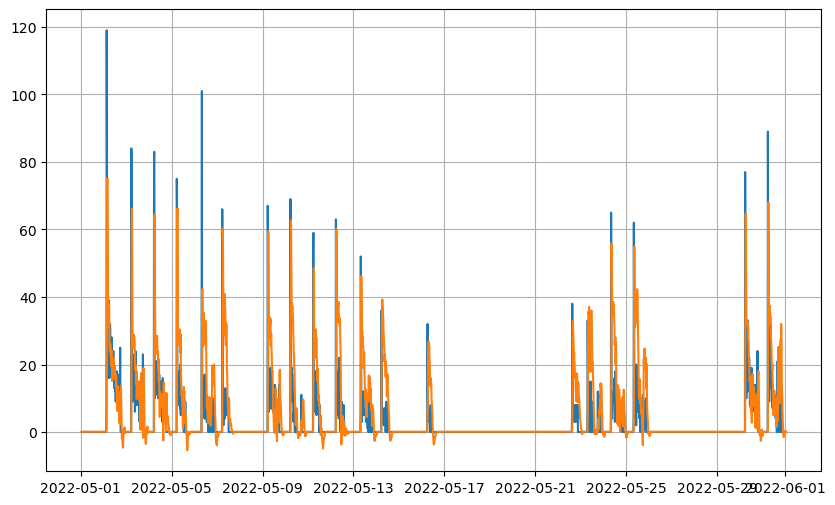

In [25]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    # Get predictions on the entire dataset
    forecast = model.predict(dataset)
    
    return forecast

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [26]:
# Compute the MAE
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

4.209049
